In [12]:
import pandas as pd 
import matplotlib.pyplot as plt 
from prophet import Prophet 
from statsmodels.tsa.seasonal import seasonal_decompose 
import numpy as np 

In [13]:
# Correct the path of the dataset 
data_path ='TSLA.csv' 
# load the data from the file
df =pd.read_csv(data_path) 

# display the first few rows  of the dataset
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2010-06-29,3.800,5.000,3.508,4.778,4.778,93831500
1,2010-06-30,5.158,6.084,4.660,4.766,4.766,85935500
2,2010-07-01,5.000,5.184,4.054,4.392,4.392,41094000
3,2010-07-02,4.600,4.620,3.742,3.840,3.840,25699000
4,2010-07-06,4.000,4.000,3.166,3.222,3.222,34334500


In [14]:
# cheack the missing values 
missing_values =df.isnull().sum() 

# Basic statistical details 
statistics =df.describe() 

missing_values,statistics 

(Date         0
 Open         0
 High         0
 Low          0
 Close        0
 Adj Close    0
 Volume       0
 dtype: int64,
               Open         High          Low        Close    Adj Close  \
 count  2956.000000  2956.000000  2956.000000  2956.000000  2956.000000   
 mean    138.691296   141.771603   135.425953   138.762183   138.762183   
 std     250.044839   255.863239   243.774157   250.123115   250.123115   
 min       3.228000     3.326000     2.996000     3.160000     3.160000   
 25%      19.627000    20.402000    19.127500    19.615000    19.615000   
 50%      46.656999    47.487001    45.820002    46.545000    46.545000   
 75%      68.057001    69.357500    66.911501    68.103998    68.103998   
 max    1234.410034  1243.489990  1217.000000  1229.910034  1229.910034   
 
              Volume  
 count  2.956000e+03  
 mean   3.131449e+07  
 std    2.798383e+07  
 min    5.925000e+05  
 25%    1.310288e+07  
 50%    2.488680e+07  
 75%    3.973875e+07  
 max    3.04

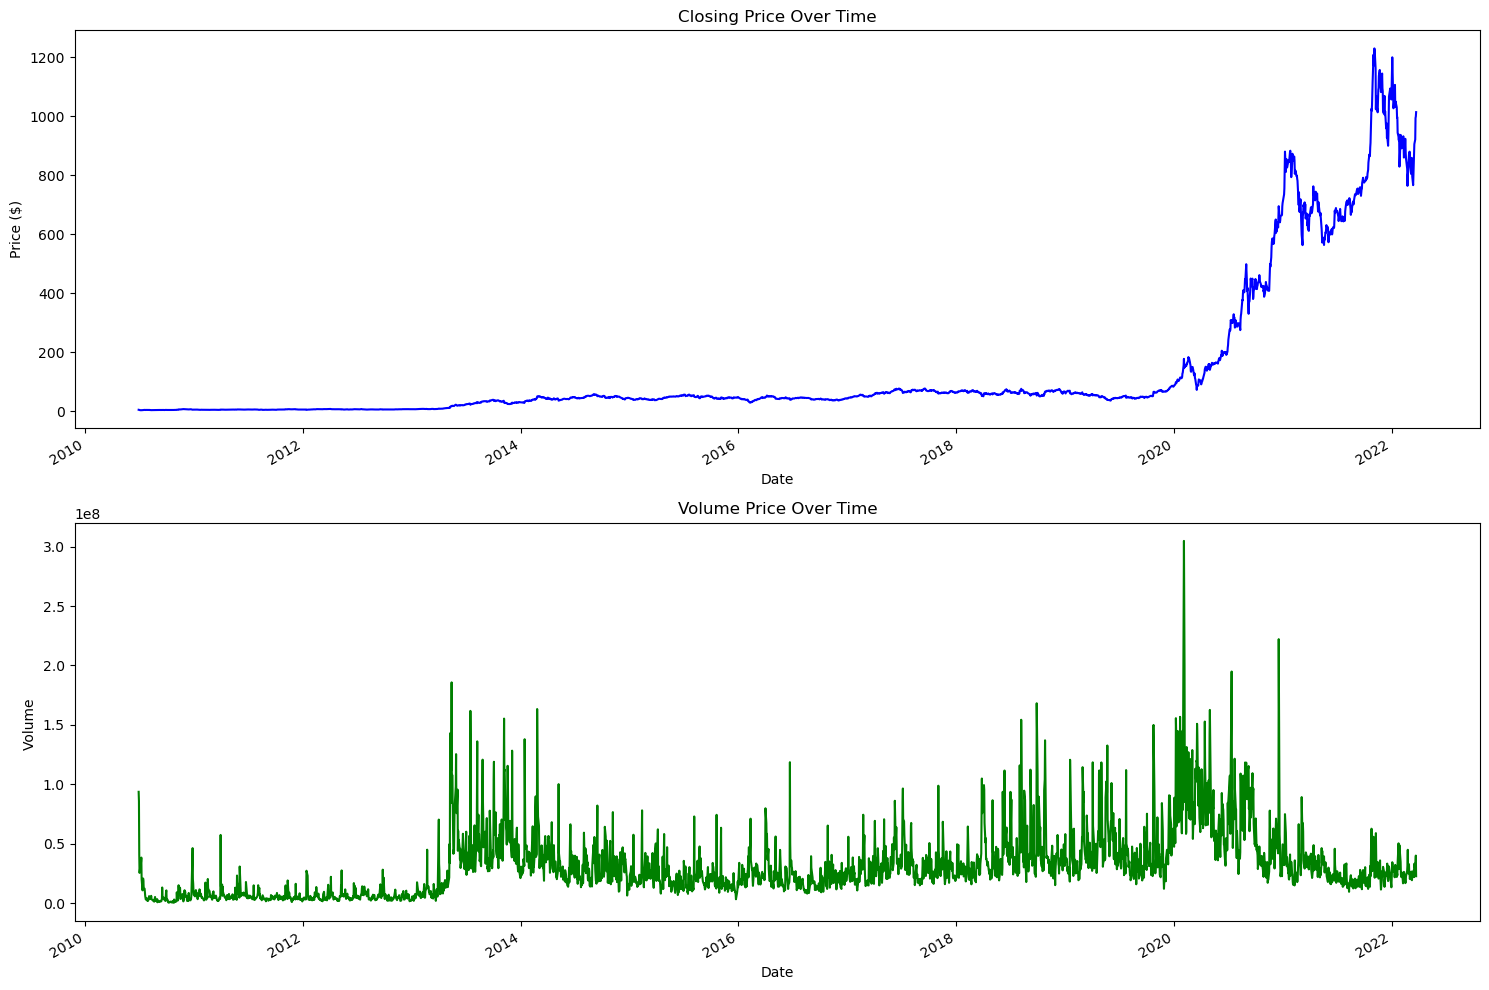

In [15]:
import matplotlib.pyplot as plt  

#convert the 'Date' columns to datetime format 
df['Date'] =pd.to_datetime(df['Date']) 

# set the date as the index of the DataFrame for plotting  
df.set_index('Date',inplace=True) 

#create a figure and a set of subplots  
fig,ax =plt.subplots(nrows=2,ncols=1,figsize=(15,10)) 

# Plot the closing prices over time 
df['Close'].plot(ax=ax[0],color='blue') 
ax[0].set_title('Closing Price Over Time') 
ax[0].set_ylabel('Price ($)') 

#Plot the trading volume over time 
df['Volume'].plot(ax=ax[1],color='green') 
ax[1].set_title('Volume Price Over Time') 
ax[1].set_ylabel('Volume ') 

#improve the layout 
plt.tight_layout() 
plt.show()